Optimum number of communities: 15


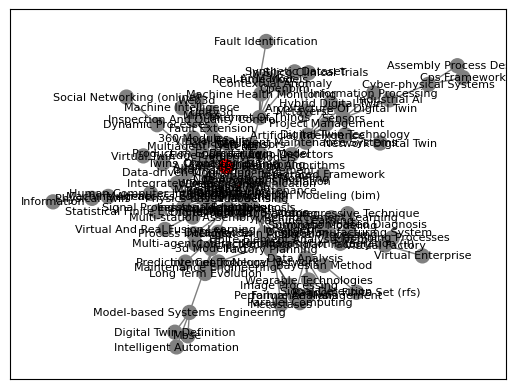

Community 1:
Root nodes: ['Predictive Maintenance', 'Virtual Simulation', 'Information Management', 'Physics-based Model', 'Industrial Internet', '5g', 'Technology']
Stem nodes: ['Digital Twin', 'Building Information Modeling (bim)', 'Soft Sensors', 'Multi-agent Interaction', 'Virtual And Real Fusion Learning', 'Integrated Framework', 'Statistical Finite Element Method', 'Multi-access Edge Computing']
Leaf nodes: ['Nde 4', 'Wireless Communication', 'Virtual Sensing', 'Computer Vision', 'Digital Twin (dt) Systems']
Sum of nodes: 20
Total number of roots: 7
Total number of stems: 8
Total number of leaves: 5
Community 2:
Root nodes: []
Stem nodes: ['Machine Learning']
Leaf nodes: ['Autoregressive Technique', 'Reinforcement Learning', 'Surrogate Modeling', 'Data Analysis', 'Information Integration (ii)', 'Simulation-based Diagnosis', 'Metadata', 'Digital Manufacturing System', 'Signal Processing']
Sum of nodes: 18
Total number of roots: 0
Total number of stems: 1
Total number of leaves: 9


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Import network with graphml format. Graph is undirected
G = nx.read_graphml('/content/MST Path Finder Done DT.graphml')

# 2. Calculate betweenness centrality for all nodes
bc = nx.betweenness_centrality(G)

# 3. Identify core node: node with highest BC will be core node
core_node = max(bc, key=bc.get)

# 4. Use modularity algorithm for detecting communities and then print and plot optimum number of communities.
modularity = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
num_communities = len(modularity)
print(f'Optimum number of communities: {num_communities}')

# Plot network with communities
pos = nx.spring_layout(G)
node_colors = []
for node in G.nodes():
    if node in core_node:
        node_colors.append('red')
    else:
        node_colors.append('gray')
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')
plt.show()

# 5. Identify roots. Nodes that have link with core node and have degree centrality > 1.
roots = []
for node in G.nodes():
    if G.has_edge(core_node, node) and G.degree(node) > 1:
        roots.append(node)
root_labels = [labels[root] for root in roots]

# 6. Create a list of root nodes for all communities with above rule
community_roots = []
for i, community in enumerate(modularity):
    root_nodes = [node for node in community if node in roots]
    community_roots.append(root_nodes)

# 7. Identify stems: Stems are nodes that have a relationship with roots.
stems = []
for root in roots:
    for neighbor in G.neighbors(root):
        if neighbor not in roots:
            stems.append(neighbor)
stems = list(set(stems))
stem_labels = [labels[stem] for stem in stems]

# 8. Identify leaves: Leaves are nodes that have relationships with stems in each community.
leaves = []
for stem in stems:
    for neighbor in G.neighbors(stem):
        if neighbor not in roots and neighbor not in stems:
            leaves.append(neighbor)
leaves = list(set(leaves))
leaf_labels = [labels[leaf] for leaf in leaves]

# Print results for each community
for i, community in enumerate(modularity):
    print(f'Community {i+1}:')
    print(f'Root nodes: {[labels[root] for root in community_roots[i]]}')
    stem_nodes = [node for node in community if node in stems]
    print(f'Stem nodes: {[labels[stem] for stem in stem_nodes]}')
    leaf_nodes = [node for node in community if node in leaves]
    print(f'Leaf nodes: {[labels[leaf] for leaf in leaf_nodes]}')
    print(f'Sum of nodes: {len(community)}')
    root_nodes = [node for node in community if node in roots]
    print(f'Total number of roots: {len(root_nodes)}')
    print(f'Total number of stems: {len(stem_nodes)}')
    print(f'Total number of leaves: {len(leaf_nodes)}')


In [ ]:
partition = {}
for i, community in enumerate(modularity):
    for node in community:
        partition[node] = i


In [ ]:
# Add the community class as a node attribute
for node in G.nodes():
    G.nodes[node]['community'] = partition[node]


# Save the graph with all attributes
nx.write_graphml(G, '/content/DP-post-analysis.graphml')